# **Import Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# **Load the Dataset**

In [2]:
df = pd.read_csv('/content/Last.fm_data.csv')

### Drop the unnamed column (index)

In [6]:
df = df.drop(columns=['Unnamed: 0'])

### Check basic structure

In [7]:
print(df.head())

  Username           Artist                          Track  \
0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1  Babs_05  Isobel Campbell                   Dusty Wreath   
2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21  


# **Process the Timestamp**

### Combine Date and Time into one datetime column

In [8]:
df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d %b %Y %H:%M')

### Now drop the old Date and Time columns

In [9]:
df = df.drop(columns=['Date', 'Time'])

In [10]:
print(df.head())

  Username           Artist                          Track  \
0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1  Babs_05  Isobel Campbell                   Dusty Wreath   
2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album           timestamp  
0  Ballad of the Broken Seas 2021-01-31 23:36:00  
1  Ballad of the Broken Seas 2021-01-31 23:32:00  
2  Ballad of the Broken Seas 2021-01-31 23:28:00  
3  Ballad of the Broken Seas 2021-01-31 23:25:00  
4  Ballad of the Broken Seas 2021-01-31 23:21:00  


# **Create the "Repeated Listen" Label**

In [11]:
df = df.sort_values(by=['Username', 'Track', 'timestamp'])

### Create a previous timestamp for the same Username+Track

In [13]:
df['prev_timestamp'] = df.groupby(['Username', 'Track'])['timestamp'].shift(1)

### Calculate the time difference in days


In [14]:
df['days_diff'] = (df['timestamp'] - df['prev_timestamp']).dt.days

### Create the repeated listen label

In [15]:
df['repeated_within_month'] = df['days_diff'].apply(lambda x: 1 if pd.notna(x) and x <= 30 else 0)

### Fill NaNs (first listens) with 0

In [16]:
df['repeated_within_month'] = df['repeated_within_month'].fillna(0).astype(int)

### View the new dataset

In [17]:
print(df[['Username', 'Track', 'timestamp', 'repeated_within_month']].head(10))

      Username                                              Track  \
18447  Babs_05                                   !Ed Buys Houses!   
9504   Babs_05                                  !holyshitohmygod!   
25542  Babs_05  "Eye" No, Alphabet St., Glam Slam, Anna Stesia...   
6419   Babs_05                                           "Heroes"   
9509   Babs_05  "I Want You To Rip My Heart Out" - Extended Ve...   
23554  Babs_05                                            "I" Luz   
18314  Babs_05  "Macapaba: Equinócio Solar, Viagens Fantástica...   
22856  Babs_05                                       "Omar comin"   
22185  Babs_05                   "The Take Over, the Breaks Over"   
25649  Babs_05  "Yeah, I Don't Know What It's Like To Be Aroun...   

                timestamp  repeated_within_month  
18447 2021-01-28 17:13:00                      0  
9504  2021-01-31 18:54:00                      0  
25542 2021-01-29 22:08:00                      0  
6419  2021-01-31 11:44:00           

# **Feature Engineering**

### Create features from timestamp

In [18]:
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day

# **Build and Train the Machine Learning Model**

### Define features and target

In [19]:
features = ['hour', 'day_of_week', 'day']
target = 'repeated_within_month'

X = df[features]
y = df[target]

### Split into train and test sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initialize random forest

In [21]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

### Predict

In [22]:
y_pred = model.predict(X_test)

### Evaluate

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     25070
           1       0.63      0.01      0.02      8161

    accuracy                           0.76     33231
   macro avg       0.69      0.50      0.44     33231
weighted avg       0.72      0.76      0.65     33231



# **Plot How Many Users Repeated Songs**

<ipython-input-34-98aaab753bf3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repeat_counts.index, y=repeat_counts.values, palette='viridis')


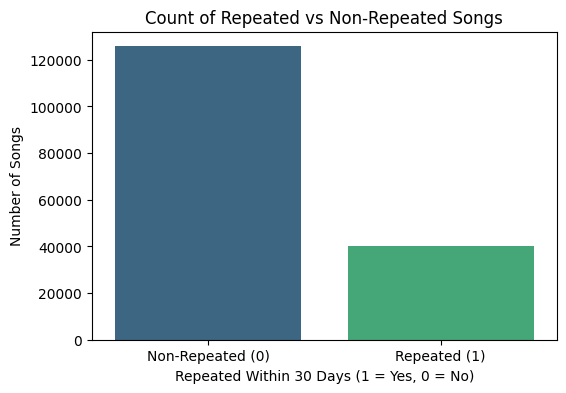

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of repeated vs non-repeated songs
repeat_counts = df['repeated_within_month'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=repeat_counts.index, y=repeat_counts.values, palette='viridis')
plt.title('Count of Repeated vs Non-Repeated Songs')
plt.xlabel('Repeated Within 30 Days (1 = Yes, 0 = No)')
plt.ylabel('Number of Songs')
plt.xticks([0, 1], ['Non-Repeated (0)', 'Repeated (1)'], rotation=0)
plt.show()


# **Plot Number of Users Repeating Songs**

<ipython-input-38-2a8b3b076341>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_repeat_counts.index, y=user_repeat_counts.values, palette='Blues')


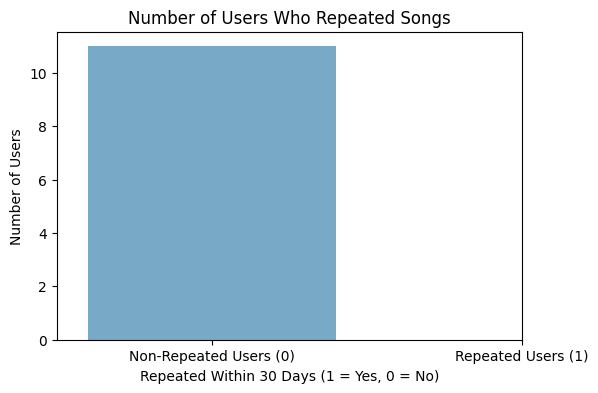

In [38]:
# Count unique users who repeated songs (1) vs non-repeated (0)
user_repeat_counts = df.groupby('Username')['repeated_within_month'].max().value_counts()

# Plotting with a new color palette
plt.figure(figsize=(6, 4))
sns.barplot(x=user_repeat_counts.index, y=user_repeat_counts.values, palette='Blues')
plt.title('Number of Users Who Repeated Songs')
plt.xlabel('Repeated Within 30 Days (1 = Yes, 0 = No)')
plt.ylabel('Number of Users')
plt.xticks([0, 1], ['Non-Repeated Users (0)', 'Repeated Users (1)'], rotation=0)
plt.show()


# **Plot Repeated Songs by Time of Day**

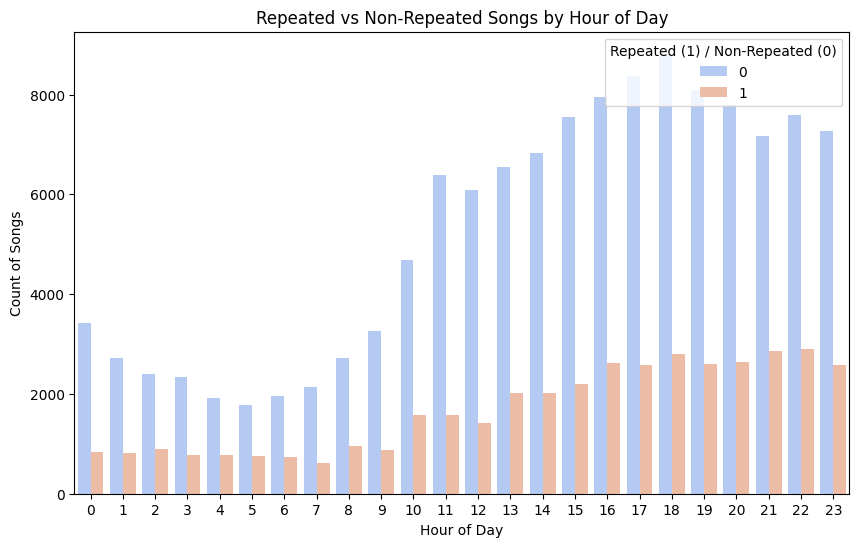

In [39]:
# Plot repeated vs non-repeated songs by hour of day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', hue='repeated_within_month', palette='coolwarm')
plt.title('Repeated vs Non-Repeated Songs by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Songs')
plt.legend(title='Repeated (1) / Non-Repeated (0)', loc='upper right')
plt.show()

# **Plot Repeated Songs by Day of the Week**

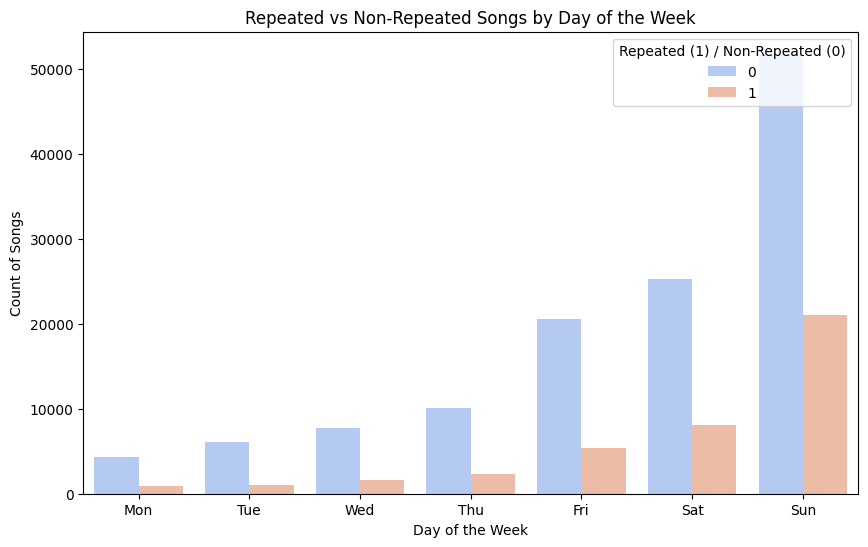

In [40]:
# Plot repeated vs non-repeated songs by day of week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='repeated_within_month', palette='coolwarm')
plt.title('Repeated vs Non-Repeated Songs by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Songs')
plt.legend(title='Repeated (1) / Non-Repeated (0)', loc='upper right')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()